<a href="https://colab.research.google.com/github/JonSax88/PracticalMachineLearning/blob/main/Sax_Assignment1_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from pandas import Categorical 

%matplotlib inline
sns.set()

In [ ]:
df_train = pd.read_csv("/content/Assignment1/train.csv")
df_train.head(n=4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head(n=4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [ ]:
newtrainDF = df_train[['BldgType', 'BsmtFinType2', 'BedroomAbvGr', 'LotArea', 'SalePrice']].copy()

Management/Research Question:

Do the following four variables predict SalePrice?

1. BldgType (building type)
2. BsmtFinType2 (basement finish type)
3. Bedroom (number of bedrooms above grade)
4. Lot area (lot size in square feet)


Let's first take a look at some summary statistics of the two numeric variables in question, # of bedrooms above grade, and lot area.

In [ ]:
newtrainDF.describe()

,BedroomAbvGr,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,2.866438,10516.828082,180921.195890
std,0.815778,9981.264932,79442.502883
min,0.000000,1300.000000,34900.000000
25%,2.000000,7553.500000,129975.000000
50%,3.000000,9478.500000,163000.000000
75%,3.000000,11601.500000,214000.000000
max,8.000000,215245.000000,755000.000000


Now let's do some quick data cleaning by dropping entries with any null 'BldgType', 'BsmtFinType2', or 'BedroomAbvGr' cells.

In [ ]:
newtrainDF = newtrainDF.dropna()

Let's also drop all of the entries with more than six bedrooms as those are outliers.

In [ ]:
newtrainDF = newtrainDF[newtrainDF['BedroomAbvGr'] <= 6]
newtrainDF

,BldgType,BsmtFinType2,BedroomAbvGr,LotArea,SalePrice
0,1Fam,Unf,3,8450,208500
1,1Fam,Unf,3,9600,181500
2,1Fam,Unf,3,11250,223500
3,1Fam,Unf,3,9550,140000
4,1Fam,Unf,4,14260,250000
...,...,...,...,...,...
1455,1Fam,Unf,3,7917,175000
1456,1Fam,Rec,3,13175,210000
1457,1Fam,Unf,4,9042,266500
1458,1Fam,Rec,2,9717,142125


Finally, let's drop all of the homes with over 50,000 ft^2.

In [ ]:
newtrainDF = newtrainDF[newtrainDF['LotArea'] <= 50000]
newtrainDF

,BldgType,BsmtFinType2,BedroomAbvGr,LotArea,SalePrice
0,1Fam,Unf,3,8450,208500
1,1Fam,Unf,3,9600,181500
2,1Fam,Unf,3,11250,223500
3,1Fam,Unf,3,9550,140000
4,1Fam,Unf,4,14260,250000
...,...,...,...,...,...
1455,1Fam,Unf,3,7917,175000
1456,1Fam,Rec,3,13175,210000
1457,1Fam,Unf,4,9042,266500
1458,1Fam,Rec,2,9717,142125


Now let's look at a histogram of sale prices.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


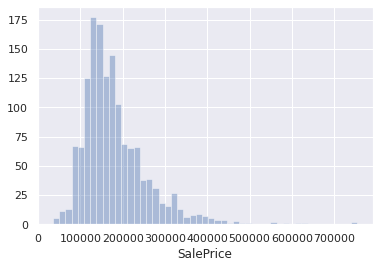

In [ ]:
sns.distplot(newtrainDF.SalePrice, kde = False)

Let's use a pandas plotting method to plot the column of interest on the same plot, and let's also count the number of houses in each category of each column.

Building Type:

1Fam      1210
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64

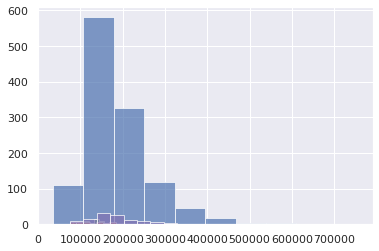

In [ ]:
newtrainDF.groupby('BldgType').SalePrice.hist(alpha=0.7)
newtrainDF.BldgType.value_counts()

Basement Finish Type:

Unf    1247
Rec      52
LwQ      46
BLQ      32
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

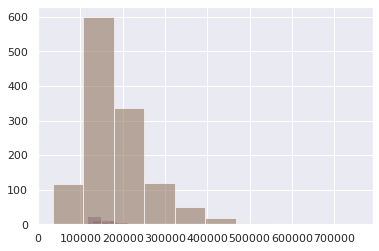

In [ ]:
newtrainDF.groupby('BsmtFinType2').SalePrice.hist(alpha=0.6)
newtrainDF.BsmtFinType2.value_counts()

Number of Bedrooms Above Grade:

3    799
2    355
4    211
1     50
5     21
6      7
0      5
Name: BedroomAbvGr, dtype: int64

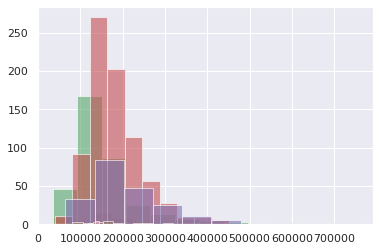

In [ ]:
newtrainDF.groupby('BedroomAbvGr').SalePrice.hist(alpha=0.6)
newtrainDF.BedroomAbvGr.value_counts()

Lot Area:

LotArea
1300     AxesSubplot(0.125,0.125;0.775x0.755)
1477     AxesSubplot(0.125,0.125;0.775x0.755)
1491     AxesSubplot(0.125,0.125;0.775x0.755)
1526     AxesSubplot(0.125,0.125;0.775x0.755)
1533     AxesSubplot(0.125,0.125;0.775x0.755)
                         ...                 
36500    AxesSubplot(0.125,0.125;0.775x0.755)
39104    AxesSubplot(0.125,0.125;0.775x0.755)
40094    AxesSubplot(0.125,0.125;0.775x0.755)
45600    AxesSubplot(0.125,0.125;0.775x0.755)
46589    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, Length: 1061, dtype: object

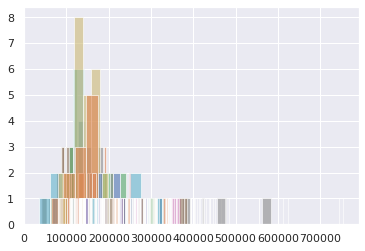

In [ ]:
newtrainDF.groupby('LotArea').SalePrice.hist(alpha=0.6)

# I didn't run the value_counts code here since there are so many different
# square footages among the homes in our analysis.

Now let's compare the same four variables against SalePrice, but this time, using stripplots instead of histograms.

Building Type:

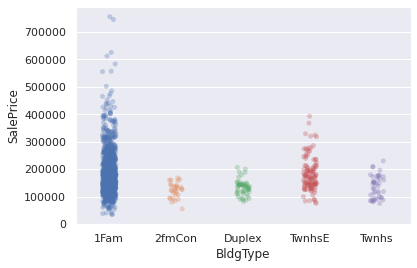

In [ ]:
sns.stripplot(x = 'BldgType', y = 'SalePrice', data=newtrainDF, alpha=0.3)

Basement Finish Type:

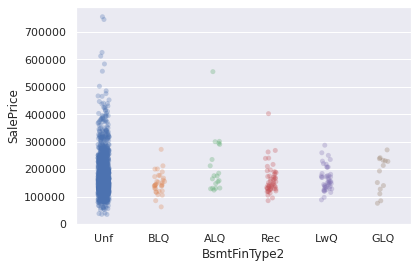

In [ ]:
sns.stripplot(x = 'BsmtFinType2', y = 'SalePrice', data=newtrainDF, alpha=0.3)

Number of Bedrooms Above Grade:

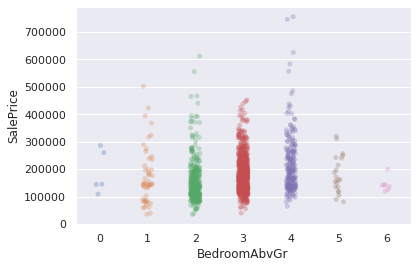

In [ ]:
sns.stripplot(x = 'BedroomAbvGr', y = 'SalePrice', data=newtrainDF, alpha=0.3)

For lot area, it doesn't make sense to do a stripplot. Rather, a scatterplot:

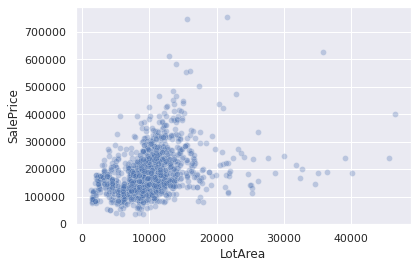

In [ ]:
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data=newtrainDF, alpha=0.3)

Now let's use the DataFrame method .describe() to check out summary statistics of 'SalePrice' as a function of each variable in question.


In [ ]:
newtrainDF.groupby('BldgType').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1Fam,1210.0,184842.020661,81782.222661,34900.0,131000.0,167500.0,220000.0,755000.0
2fmCon,29.0,122498.275862,27692.406395,55000.0,106250.0,125000.0,140000.0,168000.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0


In [ ]:
newtrainDF.groupby('BsmtFinType2').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType2,,,,,,,,
ALQ,19.0,209942.105263,104764.743411,123500.0,139000.0,174900.0,262500.0,555000.0
BLQ,32.0,148668.218750,39821.443068,62383.0,126875.0,143000.0,168375.0,271900.0
GLQ,14.0,180982.142857,64573.040359,75500.0,130250.0,203125.0,231500.0,270000.0
LwQ,46.0,164364.130435,43255.035241,88000.0,134500.0,154000.0,179750.0,287000.0
Rec,52.0,160971.634615,52519.375283,85000.0,129000.0,145500.0,176725.0,402000.0
Unf,1247.0,183912.214114,80548.195626,34900.0,132000.0,166000.0,216918.5,755000.0


In [ ]:
newtrainDF.groupby('BedroomAbvGr').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BedroomAbvGr,,,,,,,,
0,5.0,188791.800000,78767.609055,108959.0,144000.0,145000.0,260000.0,286000.0
1,50.0,173162.420000,102975.067584,35311.0,87500.0,145250.0,208975.0,501837.0
2,355.0,157173.977465,77705.929725,34900.0,109700.0,137000.0,184950.0,611657.0
3,799.0,180733.133917,63557.725161,40000.0,136500.0,169900.0,213375.0,451950.0
4,211.0,218647.995261,107740.879306,64500.0,139800.0,192140.0,264489.5,755000.0
5,21.0,180819.047619,68472.480743,81000.0,135000.0,161500.0,240000.0,320000.0
6,7.0,143779.000000,26455.384839,119000.0,130450.0,141000.0,142776.5,200000.0


In [ ]:
newtrainDF.groupby('LotArea').SalePrice.describe() 
# This wasn't very helpful! Which is why we'll create a new category below.

,count,mean,std,min,25%,50%,75%,max
LotArea,,,,,,,,
1300,1.0,124000.0,NaN,124000.0,124000.0,124000.0,124000.0,124000.0
1477,1.0,80000.0,NaN,80000.0,80000.0,80000.0,80000.0,80000.0
1491,1.0,75500.0,NaN,75500.0,75500.0,75500.0,75500.0,75500.0
1526,1.0,86000.0,NaN,86000.0,86000.0,86000.0,86000.0,86000.0
1533,2.0,94500.0,3535.533906,92000.0,93250.0,94500.0,95750.0,97000.0
...,...,...,...,...,...,...,...,...
36500,1.0,190000.0,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
39104,1.0,241500.0,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
40094,1.0,184750.0,NaN,184750.0,184750.0,184750.0,184750.0,184750.0


## Modeling

Now we are going to engage in feature creation by creating a new category called "Lot Category", which splits the LotArea column into two different sizes: 

Regular Lot (0-10,000 ft^2) <br>
Large Lot (10,001-50,000 ft^2)

In [ ]:
LotCategory = Categorical(np.where(newtrainDF.LotArea > 10000,1,0))
LotCategory.describe()

,counts,freqs
categories,,
0,842,0.581492
1,606,0.418508


In [ ]:
# be more descriptive than a 1 or a 0
LotCategory.rename_categories(['Regular Lot', 'Large Lot'],inplace=True)
LotCategory.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  


,counts,freqs
categories,,
Regular Lot,842,0.581492
Large Lot,606,0.418508


In [ ]:
# create a new column with this variable
newtrainDF['Lot Category'] = LotCategory
newtrainDF.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BldgType,BsmtFinType2,BedroomAbvGr,LotArea,SalePrice,Lot Category
0,1Fam,Unf,3,8450,208500,Regular Lot
1,1Fam,Unf,3,9600,181500,Regular Lot
2,1Fam,Unf,3,11250,223500,Large Lot
3,1Fam,Unf,3,9550,140000,Regular Lot
4,1Fam,Unf,4,14260,250000,Large Lot
5,1Fam,Unf,1,14115,143000,Large Lot
6,1Fam,Unf,3,10084,307000,Large Lot
7,1Fam,BLQ,3,10382,200000,Large Lot
8,1Fam,Unf,2,6120,129900,Regular Lot
9,2fmCon,Unf,2,7420,118000,Regular Lot


Now let's see how this changes the shape of the stripplot:

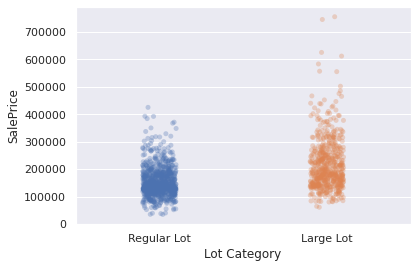

In [ ]:
sns.stripplot(x = 'Lot Category', y = 'SalePrice', data=newtrainDF, alpha=0.3)

and histogram:

Lot Category
Regular Lot    AxesSubplot(0.125,0.125;0.775x0.755)
Large Lot      AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, dtype: object

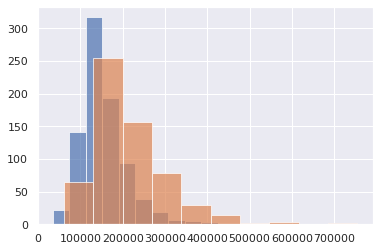

In [ ]:
newtrainDF.groupby('Lot Category').SalePrice.hist(alpha=0.7)

I am not sure what to do for Requirement 5: *Using the dependent variable, perform both min-max and standard scaling in Python.*

I haven't done this before, but I looked around online and found the following scaling technique using sklearn:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Isolate the SalePrice column:

In [ ]:
SalePriceDF = newtrainDF[['BedroomAbvGr', 'SalePrice']] #apparently I needed 2x columns so I added the other numeric variable, bedrooms above grade.
SalePriceDF

,BedroomAbvGr,SalePrice
0,3,208500
1,3,181500
2,3,223500
3,3,140000
4,4,250000
...,...,...
1455,3,175000
1456,3,210000
1457,4,266500
1458,2,142125


In [ ]:
# fit scaler on the training data's SalePrice column
norm = MinMaxScaler().fit(SalePriceDF)

In [ ]:
# transform training data
SalePrice_norm = norm.transform(SalePriceDF)

SalePrice_norm

array([[0.5       , 0.24107763],
       [0.5       , 0.20358284],
       [0.5       , 0.26190807],
       ...,
       [0.66666667, 0.321622  ],
       [0.33333333, 0.14890293],
       [0.5       , 0.15636717]])

# Conclusion

With so many variables to choose from, I chose four evident attributes that all had a discernable effect on SalePrice: building type, basement finish type, number of bedrooms above grade, and lot area. The basement finish type variable had some null values, so I decided to include this attribute since it created a reason for me to dropna. Lot area was an ideal attribute to split, since (1) it's a clear-cut indicator of SalePrice and (2) there were outliers for me to exclude from the cleaned dataframe.

Overall, I was surprised that the dataset's SalePrices had so many outliers. For example, there was one home that had 8x bedrooms, but was only $200,000. That was an obvious entry to exclude from the cleaned dataframe as well.

Additionally, it was interesting to observe that the distribution of bedrooms vs. SalePrice actually follows more of a normal distribution than a linear one (more bedrooms mean higher sale price).

Fortunately, the LotArea vs. SalePrice scatterplot highlighted what the main gist of this Assignment was; that SalePrice fluctuates based on the level of abundance of certain resources, like square footage.